In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading my dataset**

In [3]:
data = pd.read_excel("online_retail_II.xlsx")
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
print(f"Min date: {data['InvoiceDate'].min()}")
print(f"Max date : {data['InvoiceDate'].max()}")

Min date: 2009-12-01 07:45:00
Max date : 2010-12-09 20:01:00


# **ABOUT DATASET**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2010.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
data['Customer ID'].value_counts()

Customer ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
17557.0       1
14190.0       1
13551.0       1
17546.0       1
13231.0       1
Name: count, Length: 4383, dtype: int64

# **Data Cleaning**

In [7]:
print() 

Dropping all rows where invoice starts with 'C'

Reason: Invoice starting with 'C' are cancellation / returns , Returns are negative behaviour and will distort spending calcultaions

In [8]:
data = data[~data['Invoice'].astype(str).str.startswith('C')]
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Dropping all rows where Quantity is less than 0

Reason: Negative quantity can count as returns / invalid / Zero and doesn't count as real purchases

In [9]:
data = data[data['Quantity'] > 0 ]
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Droppong rows with negative price (Can be caused by data error )

Reason: Negative price is meaningless for calculating spending score

In [10]:
data = data[data['Price'] > 0]
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


Dropping rows with missing customer ID

Reason : Cannot track behavioural change with missing customer ID

In [11]:
data = data.dropna(subset='Customer ID')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# **Computing aggregate features  per customer**

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
print(f"Min date: {data['InvoiceDate'].min()}")
print(f"Max date : {data['InvoiceDate'].max()}")

Min date: 2009-12-01 07:45:00
Max date : 2010-12-09 20:01:00


In [14]:
period1 = data[data['InvoiceDate'] <= '2010-05-31']
period2 = data[data['InvoiceDate'] >= '2010-06-01']

In [15]:
agg_period1 = period1.groupby('Customer ID').agg(TotalSpend = ('Quantity', lambda x: (x* period1.loc[x.index, 'Price']).sum()), 
NumTransactions = ('Invoice', 'nunique'),
AvgBasketSize = ('Quantity', 'mean')).reset_index() 

In [16]:
agg_period1

,Customer ID,TotalSpend,NumTransactions,AvgBasketSize
0,12346.0,230.55,10,3.642857
1,12349.0,1268.52,2,10.085106
2,12355.0,488.21,1,13.772727
3,12358.0,1429.83,1,18.176471
4,12359.0,1522.23,4,11.772727
...,...,...,...,...
2698,18281.0,120.32,1,9.200000
2699,18283.0,354.42,3,1.310606
2700,18285.0,427.00,1,12.083333
2701,18286.0,462.95,1,6.705882


In [17]:
agg_period2 = period2.groupby('Customer ID').agg(TotalSpend = ('Quantity', lambda x: (x* period2.loc[x.index, 'Price']).sum()), 
NumTransactions = ('Invoice', 'nunique'), 
AvgBasketSize = ('Quantity', 'mean')).reset_index() 

In [18]:
data['Customer ID'].value_counts()

Customer ID
14911.0    5570
17841.0    5043
14606.0    3866
14156.0    2648
12748.0    2633
           ... 
15040.0       1
13222.0       1
14106.0       1
13942.0       1
14576.0       1
Name: count, Length: 4312, dtype: int64

In [19]:
agg_period2

,Customer ID,TotalSpend,NumTransactions,AvgBasketSize
0,12346.0,142.31,1,1.000000
1,12347.0,1323.32,2,11.661972
2,12348.0,222.16,1,18.650000
3,12349.0,1402.62,1,9.436364
4,12351.0,300.93,1,12.428571
...,...,...,...,...
3558,18280.0,307.55,1,7.450000
3559,18283.0,287.35,3,1.663265
3560,18284.0,461.68,1,17.642857
3561,18286.0,833.48,1,9.880000


In [20]:
data_periods = pd.merge(agg_period1, agg_period2, on='Customer ID', how='outer', suffixes=('_p1','_p2'))
data_periods

,Customer ID,TotalSpend_p1,NumTransactions_p1,AvgBasketSize_p1,TotalSpend_p2,NumTransactions_p2,AvgBasketSize_p2
0,12346.0,230.55,10.0,3.642857,142.31,1.0,1.000000
1,12347.0,NaN,NaN,NaN,1323.32,2.0,11.661972
2,12348.0,NaN,NaN,NaN,222.16,1.0,18.650000
3,12349.0,1268.52,2.0,10.085106,1402.62,1.0,9.436364
4,12351.0,NaN,NaN,NaN,300.93,1.0,12.428571
...,...,...,...,...,...,...,...
4307,18283.0,354.42,3.0,1.310606,287.35,3.0,1.663265
4308,18284.0,NaN,NaN,NaN,461.68,1.0,17.642857
4309,18285.0,427.00,1.0,12.083333,NaN,NaN,NaN
4310,18286.0,462.95,1.0,6.705882,833.48,1.0,9.880000


In [21]:
data_periods = data_periods.fillna(0)

# **Computing delta features per customer**

In [22]:
data_periods['deltaTotalSpend'] = data_periods['TotalSpend_p2'] - data_periods['TotalSpend_p1']
data_periods['NumTransactions'] = data_periods['NumTransactions_p2'] - data_periods['NumTransactions_p1']
data_periods['AvgBasketSize'] = data_periods['AvgBasketSize_p2'] - data_periods['AvgBasketSize_p1']

In [23]:
X = data_periods.drop(['TotalSpend_p1', 'TotalSpend_p2', 'NumTransactions_p1', 
'NumTransactions_p2', 'AvgBasketSize_p1', 'AvgBasketSize_p2'], axis=1)
x = X.drop("Customer ID", axis=1)
x

,deltaTotalSpend,NumTransactions,AvgBasketSize
0,-88.24,-9.0,-2.642857
1,1323.32,2.0,11.661972
2,222.16,1.0,18.650000
3,134.10,-1.0,-0.648743
4,300.93,1.0,12.428571
...,...,...,...
4307,-67.07,0.0,0.352659
4308,461.68,1.0,17.642857
4309,-427.00,-1.0,-12.083333
4310,370.53,0.0,3.174118


# **Scaling features for even distribution**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.17776056, -3.11942153, -0.06863581],
       [ 0.38476782,  0.37788156,  0.08953163],
       [-0.05406139,  0.05994492,  0.16679775],
       ...,
       [-0.31276164, -0.57592837, -0.17301846],
       [ 0.00506634, -0.25799173, -0.00431795],
       [-0.06190019,  0.37788156,  0.05859245]], shape=(4312, 3))

# **Computing silhouette score**
as ametric for evaluating optimal number of clusters (k).

**Conclusion:** optimal value for k = 3, As it managed to have the highest silhouette score

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = [2, 3, 4, 5, 6, 7, 8]
sil_score = []
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = km.fit_predict(x_scaled)
    sil_score.append(silhouette_score(x, labels))

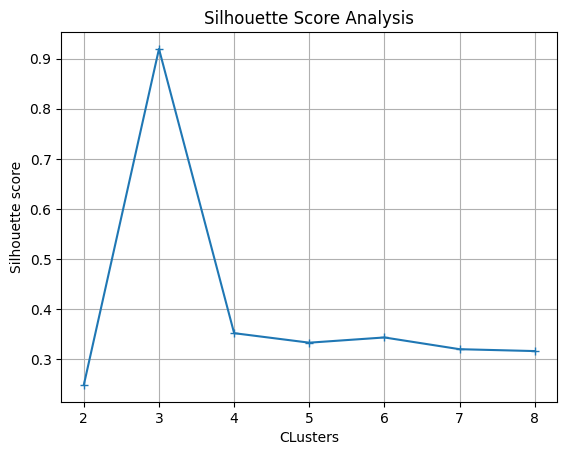

In [26]:
plt.plot(K, sil_score, marker='+')
plt.xlabel("CLusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Score Analysis")

plt.grid()
plt.show()

In [27]:
print()

# **Training my Model**

In [28]:
Model = KMeans(n_clusters=3, init='k-means++', random_state=42)
Model.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [29]:
X['Clusters'] = Model.labels_
X['Clusters'].value_counts()

Clusters
1    3004
0    1292
2      16
Name: count, dtype: int64

# **Computing centroid value per cluster**

In [30]:
centroids = scaler.inverse_transform(Model.cluster_centers_) 

In [31]:
centroid_table = pd.DataFrame(centroids, columns=['deltaTotalSpend', 'NumTransactions', 'AvgBasketSize'])
centroid_table['Clusters'] = centroid_table.index
centroid_table        

,deltaTotalSpend,NumTransactions,AvgBasketSize,Clusters
0,1291.422486,3.361455,15.259512,0
1,-178.571025,-0.380160,-2.647262,1
2,25676.016250,18.625000,225.487490,2


In [32]:
print()

# **Period Intervals**

Period 1: 2009-12-01 : 2010-05-30

Period 2: 2010-06-01 : 2010-12-09

# **Column meanings**

deltaTotalSpend: Change in total spend per customer between the two periods

NumTransactions: Change in the number of transactions per customer between the two periods 

AvgBasketSize: Change in average quantity per transaction per customer

In [33]:
print()

# **FINAL TABLE**

In [34]:
final_table = X.merge(centroid_table,  on='Clusters', how='left')
final_table

,Customer ID,deltaTotalSpend_x,NumTransactions_x,AvgBasketSize_x,Clusters,deltaTotalSpend_y,NumTransactions_y,AvgBasketSize_y
0,12346.0,-88.24,-9.0,-2.642857,1,-178.571025,-0.380160,-2.647262
1,12347.0,1323.32,2.0,11.661972,0,1291.422486,3.361455,15.259512
2,12348.0,222.16,1.0,18.650000,1,-178.571025,-0.380160,-2.647262
3,12349.0,134.10,-1.0,-0.648743,1,-178.571025,-0.380160,-2.647262
4,12351.0,300.93,1.0,12.428571,1,-178.571025,-0.380160,-2.647262
...,...,...,...,...,...,...,...,...
4307,18283.0,-67.07,0.0,0.352659,1,-178.571025,-0.380160,-2.647262
4308,18284.0,461.68,1.0,17.642857,1,-178.571025,-0.380160,-2.647262
4309,18285.0,-427.00,-1.0,-12.083333,1,-178.571025,-0.380160,-2.647262
4310,18286.0,370.53,0.0,3.174118,1,-178.571025,-0.380160,-2.647262


In [35]:
final_table = final_table.rename(columns={
    'deltaTotalSpend_x' : 'deltaTotalSpend',
    'NumTransactions_x' : 'NumTransactions',
    'AvgBasketSize_x' : 'AvgBasketSize'
})

final_table = final_table.rename(columns={
    'deltaTotalSpend_y' : 'deltaTotalSpend_centroids',
    'NumTransactions_y' : 'NumTransactions_centroids',
    'AvgBasketSize_y' : 'AvgBasketSize_centroids'
})
final_table

,Customer ID,deltaTotalSpend,NumTransactions,AvgBasketSize,Clusters,deltaTotalSpend_centroids,NumTransactions_centroids,AvgBasketSize_centroids
0,12346.0,-88.24,-9.0,-2.642857,1,-178.571025,-0.380160,-2.647262
1,12347.0,1323.32,2.0,11.661972,0,1291.422486,3.361455,15.259512
2,12348.0,222.16,1.0,18.650000,1,-178.571025,-0.380160,-2.647262
3,12349.0,134.10,-1.0,-0.648743,1,-178.571025,-0.380160,-2.647262
4,12351.0,300.93,1.0,12.428571,1,-178.571025,-0.380160,-2.647262
...,...,...,...,...,...,...,...,...
4307,18283.0,-67.07,0.0,0.352659,1,-178.571025,-0.380160,-2.647262
4308,18284.0,461.68,1.0,17.642857,1,-178.571025,-0.380160,-2.647262
4309,18285.0,-427.00,-1.0,-12.083333,1,-178.571025,-0.380160,-2.647262
4310,18286.0,370.53,0.0,3.174118,1,-178.571025,-0.380160,-2.647262


# **Cluster 0**

In [36]:
final_table[final_table['Clusters'] == 0]

,Customer ID,deltaTotalSpend,NumTransactions,AvgBasketSize,Clusters,deltaTotalSpend_centroids,NumTransactions_centroids,AvgBasketSize_centroids
1,12347.0,1323.32,2.0,11.661972,0,1291.422486,3.361455,15.259512
5,12352.0,343.80,2.0,10.444444,0,1291.422486,3.361455,15.259512
8,12356.0,3562.25,3.0,21.738095,0,1291.422486,3.361455,15.259512
9,12357.0,12079.99,2.0,23.509091,0,1291.422486,3.361455,15.259512
22,12376.0,503.15,2.0,18.461538,0,1291.422486,3.361455,15.259512
...,...,...,...,...,...,...,...,...
4277,18245.0,370.10,3.0,1.694028,0,1291.422486,3.361455,15.259512
4287,18258.0,310.09,2.0,7.681818,0,1291.422486,3.361455,15.259512
4289,18260.0,5495.15,11.0,-13.454525,0,1291.422486,3.361455,15.259512
4302,18277.0,1069.67,4.0,6.803571,0,1291.422486,3.361455,15.259512


**Cluster 0:** 29.96 % of the customers belong to this segment

Here, customers show Moderate increase in spending ,Customers are buying slightly more items per transaction

This segment is mostly made up of customers who increased spending , purchase frequently and increase their basket size

# **Cluster 1**

In [37]:
final_table[final_table['Clusters'] == 1] 

,Customer ID,deltaTotalSpend,NumTransactions,AvgBasketSize,Clusters,deltaTotalSpend_centroids,NumTransactions_centroids,AvgBasketSize_centroids
0,12346.0,-88.24,-9.0,-2.642857,1,-178.571025,-0.38016,-2.647262
2,12348.0,222.16,1.0,18.650000,1,-178.571025,-0.38016,-2.647262
3,12349.0,134.10,-1.0,-0.648743,1,-178.571025,-0.38016,-2.647262
4,12351.0,300.93,1.0,12.428571,1,-178.571025,-0.38016,-2.647262
6,12353.0,317.76,1.0,9.600000,1,-178.571025,-0.38016,-2.647262
...,...,...,...,...,...,...,...,...
4306,18281.0,-120.32,-1.0,-9.200000,1,-178.571025,-0.38016,-2.647262
4307,18283.0,-67.07,0.0,0.352659,1,-178.571025,-0.38016,-2.647262
4308,18284.0,461.68,1.0,17.642857,1,-178.571025,-0.38016,-2.647262
4309,18285.0,-427.00,-1.0,-12.083333,1,-178.571025,-0.38016,-2.647262


**Cluster 1:** 69.67 % of the customers belong to this segment

Here customers show Slight decrease in spending, Small drop in transaction, and basketsize

This segment represents Customers who reduced spending or were less active (Could be churn risk or low engagement customers), This segement represents the growing or active segment

# **Cluster 2**

In [38]:
final_table[final_table['Clusters'] == 2]

,Customer ID,deltaTotalSpend,NumTransactions,AvgBasketSize,Clusters,deltaTotalSpend_centroids,NumTransactions_centroids,AvgBasketSize_centroids
50,12415.0,19543.84,7.0,66.382075,2,25676.01625,18.625,225.48749
251,12748.0,9088.00,58.0,0.649776,2,25676.01625,18.625,225.48749
506,13089.0,18017.35,25.0,2.316736,2,25676.01625,18.625,225.48749
510,13093.0,19666.52,14.0,6.180871,2,25676.01625,18.625,225.48749
933,13687.0,11880.84,1.0,1937.044444,2,25676.01625,18.625,225.48749
1637,14646.0,37320.24,14.0,-15.711130,2,25676.01625,18.625,225.48749
1840,14911.0,39095.05,63.0,1.470230,2,25676.01625,18.625,225.48749
1936,15039.0,14253.89,17.0,2.132156,2,25676.01625,18.625,225.48749
1951,15061.0,20788.22,24.0,-3.358157,2,25676.01625,18.625,225.48749
2498,15838.0,37398.80,10.0,1167.771429,2,25676.01625,18.625,225.48749


**Cluster 2:** 0.37 % of the customers belong to this segment

Here, customers show huge increase in spending ,very frequent transactions,and extremely larger baskets 

This segment clusters High value customers, with really big spenders, many transactions & large basket size

In [39]:
print()

# **Difference between cluster - and cluster 2**

CLUSTER 0: Strong customers with healthy spending growth

CLUSTER 2 : Extreme, elite / VIP customers